<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
# импорт библиотек Pandas и Matplotlib, чтение файла с данными и сохранение в df 
import pandas as pd 
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
#вывод датафрейма
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [2]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

<b>Описание данных:</b>
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `city_centers_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

Название столбца `cityCenters_nearest` можно записать как `city_centers_nearest` для единообразия.

In [3]:
#Переименуем столбец `cityCenters_nearest` в `city_centers_nearest`
df.rename(columns = {'cityCenters_nearest' : 'city_centers_nearest'}, inplace = True) 

### Вывод

В столбцах: 
*	`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м);
*	`balcony` — число балконов;
*	`ceiling_height` — высота потолков (м);
*	`city_centers_nearest` — расстояние до центра города (м);
*	`days_exposition` — сколько дней было размещено объявление (от публикации до снятия);
*	`floors_total` — всего этажей в доме;
*	`is_apartment` — апартаменты (булев тип);
*	`kitchen_area` — площадь кухни в квадратных метрах (м²);
*	`living_area` — жилая площадь в квадратных метрах (м²);
*	`locality_name` — название населённого пункта;
*	`parks_around3000` — число парков в радиусе 3 км;
*	`parks_nearest` — расстояние до ближайшего парка (м);
*	`ponds_around3000` — число водоёмов в радиусе 3 км;
*	`ponds_nearest` — расстояние до ближайшего водоёма (м);

Различается количество значений, значит, в данных встречаются пропущенные значения.

В столбце `is_apartment` может хранится всего два значения, тип столбца должен быть bool, сейчас это строка.

В столбце `first_day_exposition` хранится дата размещения объявления, тип должен быть datetime, а не строкой.

Столбец `days_exposition` содержит информацию о количестве дней размещений информации, будет удобнее, если тип столбца будет выражен целыми числами, а не дробными. 

Столбец `floors_total` хранит информацию о общем количестве этажей в доме в формате дробных чисел, количество этажей не может быть дробным, лучше заменить тип на целочисленный. 

В столбце `balcony` - хранится число балконов в формате дробных чисел, количество балконов не может быть дробным, лучше заменить тип на целочисленный. 

## Предобработка данных

Посмотрим доли пропущенных значений в столбцах таблицы df

In [4]:
# посчитаем доли пропущенных значений в данных
df.isna().mean().sort_values(ascending=False)

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
city_centers_nearest    0.232879
parks_around3000        0.232837
ponds_around3000        0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
first_day_exposition    0.000000
last_price              0.000000
total_area              0.000000
studio                  0.000000
rooms                   0.000000
floor                   0.000000
open_plan               0.000000
total_images            0.000000
dtype: float64

Столбцы, отсортированные по доле пропусков:
*	`is_apartment` — пропуски в данном столбце скорее всего свидетельствуют о том, что объект не является апартаментами и их можно заменить на 0;
*	`parks_nearest` — пропуски в данном столбце могут быть вызваны ошибками автоматической системы картографических данных или отсутствием парков поблизости. Предлагаю не заполнять эти пропуски;
*	`ponds_nearest` — пропуски в данном столбце могут быть вызваны ошибками автоматической системы картографических данных или отсутствием водоемов поблизости. Предлагаю не заполнять эти пропуски;
*	`balcony` — пропуски в данном столбце скорее всего свидетельствуют о том, что у объекта нет балкона и пропуски можно заменить на 0;
*	`ceiling_height` — содержит 38 % пропусков, пропуски в данном столбце могут быть ошибками пользователей при заполнении. Предлагаю заполнить эти пропуски медианными значениями высоты потолков;
*	`airports_nearest` — пропуски в данном столбце могут быть вызваны ошибками автоматической системы картографических данных или отсутствием аэропортов поблизости. Предлагаю не заполнять эти пропуски;
*	`city_centers_nearest` — пропуски в данном столбце могут быть вызваны ошибками автоматической системы картографических данных. Предлагаю не заполнять эти пропуски;
*	`parks_around3000` — пропуски в данном столбце могут быть вызваны ошибками автоматической системы картографических данных или отсутствием парков поблизости. Предлагаю не заполнять эти пропуски;
*	`ponds_around3000` — пропуски в данном столбце могут быть вызваны ошибками автоматической системы картографических данных или отсутствием водоемов поблизости. Предлагаю не заполнять эти пропуски;
*	`days_exposition` — 13% значений содержат пропуски длительности размещения объявления. Возможно, эти объявления не были сняты с публикации на момент получения информации. Предлагаю не заполнять эти пропуски, но можно посмотреть даты публикации объявлений с пропущенной датой закрытия.
*	`kitchen_area` — площадь кухни не указана менее чем у 10% значений столбца. Предлагаю не заполнять эти пропуски т.к. количество пропусков для такого количества данных не значительно, а для более корректного заполнения пропусков понадобился дополнительный анализ строк, содержащих пропуски в столбце `kitchen_area`;
*	`living_area` — жилая площадь не указана менее чем у 8% значений столбца. Предлагаю не заполнять эти пропуски т.к. количество пропусков для такого количества данных не значительно, а для более корректного заполнения пропусков понадобился дополнительный анализ строк, содержащих пропуски в столбце `living_area`;
*	`floors_total` — количество этажей в домене не указано менее чем у 0,4% значений столбца. Предлагаю удалить эти строки;
*	`locality_name` — Название населенного пункта не указано менее чем у 0,3% значений столбца. Предлагаю удалить эти строки.

Столбец `is_apartment` имеет 88 % пропусков. Значения в `is_apartment`  должны иметь логический тип (bool), заменим пропуски на 0, а тип столбца заменим на bool 

In [5]:
#Заполняем пропуски в 'is_apartment' нулями, а тип меняем на bool 
df['is_apartment'] = df['is_apartment'].fillna(0).astype('bool')
display(df['is_apartment'])

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: is_apartment, Length: 23699, dtype: bool

В столбце `balcony` пропущено более 48% значений, заполним пропуски 0 т.к. неуказанное количество балконов скорее всего свидетельствует о их отсутствии, тип столбца заменим на int

In [6]:
#Заполняем пропуски в 'balcony' нулями, а тип меняем на int 
df['balcony'] = df['balcony'].fillna(0).astype('Int64')
df['balcony']

0        0
1        2
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    2
23698    0
Name: balcony, Length: 23699, dtype: Int64

Прежде чем заполнять пропуски в столбце `ceiling_height` проверим статистики столбца

In [7]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

(1, 10)

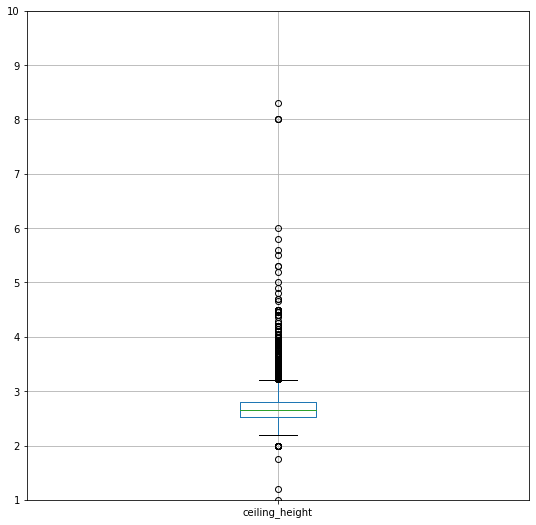

In [8]:
#Построим диаграмму размаха для оценки распределения
df.boxplot(column=['ceiling_height'], figsize=(9,9))
plt.ylim(1,10)

В столбце `ceiling_height` почти 38 % пропусков, что слишком много для удаления строк с пропусками, 75 % имеющихся значений не превышают 2.8 метров, а максимальное значение составляет 100 метров, что явно является выбросом и влияет на среднее значение, поэтому заполним пропуски медианным значением столбца. 

In [9]:
#заполняем пропуски в столбце 'ceiling_height' медианными значениями
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [10]:
df['ceiling_height'] = round(df['ceiling_height'], 2)

Проверим статистики столбца `floors_total`

In [11]:
df['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

`floors_total` надо сменить тип на целочисленный, но есть пропуски

In [12]:
df['floors_total'] = df['floors_total'].astype('Int64')
df['floors_total']

0        16
1        11
2         5
3        14
4        14
         ..
23694     5
23695     5
23696     3
23697    17
23698     5
Name: floors_total, Length: 23699, dtype: Int64

В столбце `floors_total` явных выбросов не видно, а пропущено менее 0,4 % значений. Принято решение не заполнять пропуски, а удалить пропущенные значения.

In [13]:
#Удаляем строки с пропущенными значениями `floors_total`
df = df.dropna(subset=['floors_total'])

In [14]:
df['locality_name']

0            Санкт-Петербург
1             посёлок Шушары
2            Санкт-Петербург
3            Санкт-Петербург
4            Санкт-Петербург
                ...         
23694        Санкт-Петербург
23695                  Тосно
23696       село Рождествено
23697        Санкт-Петербург
23698    поселок Новый Учхоз
Name: locality_name, Length: 23613, dtype: object

В столбце `locality_name` пропущено менее 0,3 % значений. Принято решение не заполнять пропуски, а удалить пропущенные значения. 

In [15]:
#Удаляем строки с пропущенными значениями `locality_name`
df = df.dropna(subset=['locality_name'])

Изменим не соответствующие типы данных

In [16]:
#изменим тип данных столбца 'days_exposition' на целочисленный 
df['days_exposition'] = round(df['days_exposition'])
df['days_exposition']= df['days_exposition'].astype('Int64')
df['days_exposition']

0        NaN
1         81
2        558
3        424
4        121
        ... 
23694    NaN
23695     45
23696    NaN
23697    602
23698    NaN
Name: days_exposition, Length: 23565, dtype: Int64

In [17]:
#Сменим тип строки на 'datetime' и округлим до 1-го дня 
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S').dt.round('1D')
df['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23565, dtype: datetime64[ns]

In [18]:
df['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

В столбце `days_exposition` стандартное отклонение больше, чем среднее значение, а распределение не является "нормальным". Пропущенные значения заполним медианой. 

In [19]:
#Дата публикации последнего объявления 
df['first_day_exposition'].max()

Timestamp('2019-05-03 00:00:00')

In [20]:
#Среднее время во всех публикациях 
df['first_day_exposition'].mean()

Timestamp('2017-11-10 08:59:53.125398016')

Проверим предположение о том, что пропуски в `days_exposition` вызваны более поздним размещением объявления и еще не закрытой сделкой. В таком случае заполнять пропуски не будем.

In [21]:
#Среднее время в публикациях с пропущенными данными о закрытии сделки
days_df = df.query('days_exposition.isnull()')
days_df['first_day_exposition'].mean()

Timestamp('2018-09-26 23:10:02.838221312')

В срезе с пропусками в столбце `days_exposition` средняя дата размещения `first_day_exposition` больше, чем средняя дата размещения в основном датафрейме. Это может подтверждать предположение о том, что пропуски в столбце `days_exposition` являются не закрытыми сделками. 

### Вывод

Заполнили пропуски в столбцах:
*	`is_apartment` — пропуски в данном столбце скорее всего свидетельствуют о том, что объект не является апартаментами и их можно заменить на 0;
*	`balcony` —  пропуски в данном столбце скорее всего свидетельствуют о том, что у объекта нет балкона и пропуски можно заменить на 0;
*	`ceiling_height` — содержит 38 % пропусков, пропуски в данном столбце могут быть ошибками пользователей при заполнении. Предлагаю заполнить эти пропуски медианными значениями высоты потолков.

Удалили строки с пропусками в столбцах:
*	`floors_total` — количество этажей в домене не указано менее чем у 0,4%  значений столбца. Предлагаю удалить эти строки;
*	`locality_name` — Название населенного пункта не указано менее чем у 0,3% значений столбца. Предлагаю удалить эти строки.

Сменили тип столбцов:
* `is_apartment`  на bool т.к. там хранится всего два вида значений;
* `first_day_exposition` хранится дата размещения объявления сменили тип на datetime;
* `days_exposition` содержит информацию о количестве дней размещений информации, привели к целочисленным значениям; 
* `floors_total` хранит информацию о общем количестве этажей в доме, привели к целочисленным значениям; 
* `balcony` - хранится число балконов, привели к целочисленным значениям. 

Так же проверили срез данных по пропущенным значениям в столбце `days_exposition` - 13% значений содержат пропуски длительности размещения объявления. Скорее всего эти объявления не были сняты с публикации на момент получения информации. Т.к. В срезе с пропусками в столбце `days_exposition` средняя дата размещения `first_day_exposition` больше, чем средняя дата размещения в основном датафрейме. Это может подтверждать предположение о том, что пропуски в столбце `days_exposition` являются не закрытыми сделками. Принято решение не заполнять эти пропуски.

## Расчёты и добавление результатов в таблицу

Посчитаем цену за метр и запишем в столбец `price_per_meter`.

In [22]:
#Создадим столбец 'price_per_meter' и запишем туда цену за метр
df['price_per_meter'] = round(df['last_price'] / df['total_area']).astype('Int64')

Добавим столбцы с днём недели, месяцем и годом публикации объявления

In [23]:
#Добавляем столбец день публикации объявления
df['day_exposition'] = df['first_day_exposition'].dt.weekday

In [24]:
#Добавляем столбец месяц публикации объявления
df['month_exposition'] = df['first_day_exposition'].dt.month

In [25]:
#Добавляем столбец год публикации объявления
df['year_exposition'] = df['first_day_exposition'].dt.year

Добавим столбец с категоризацией этажей; варианты — первый, последний, другой

In [26]:
#Добавляем столбец 'category_floor' с категориями этажности
df['category_floor'] = df['floor'].where(df['floor']  < 2, 'Другой')
df['category_floor'] = df['category_floor'].where(df['floor']  != df['floors_total'], 'Последний')
df['category_floor'] = df['category_floor'].where(df['floor']  > 1, 'Первый')
df['category_floor'].value_counts()

Другой       17326
Последний     3330
Первый        2909
Name: category_floor, dtype: int64

Добавим столбцы с соотношением жилой и общей площади, а также отношение площади кухни к общей площади 

In [27]:
#Соотношение жилой площади к общей площади
df['ratio_living_area'] = df['living_area'] / df['total_area']

In [28]:
#Соотношение площади кухни к общей площади
df['ratio_kitchen_area'] = df['kitchen_area'] / df['total_area']

### Вывод
Были посчитаны и добавлены следующие столбцы:
* `price_per_meter` - цена квадратного метра;
* `day_exposition` - день недели публикации объявления;
* `month_exposition` - месяц публикации объявления;
* `year_exposition` - год публикации объявления;
* `category_floor` - этаж квартиры; варианты — первый, последний, другой;
* `ratio_living_area` - соотношение жилой и общей площади;
* `ratio_kitchen_area` - соотношение площади кухни к общей площади.

## Исследовательский анализ данных

Посмотрим на статистики столбца `total_area` 

In [29]:
df['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

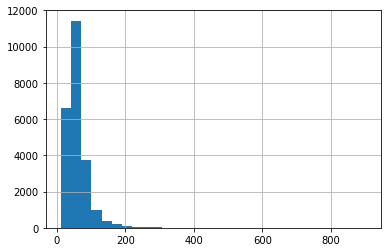

In [30]:
df['total_area'].hist(bins=30);

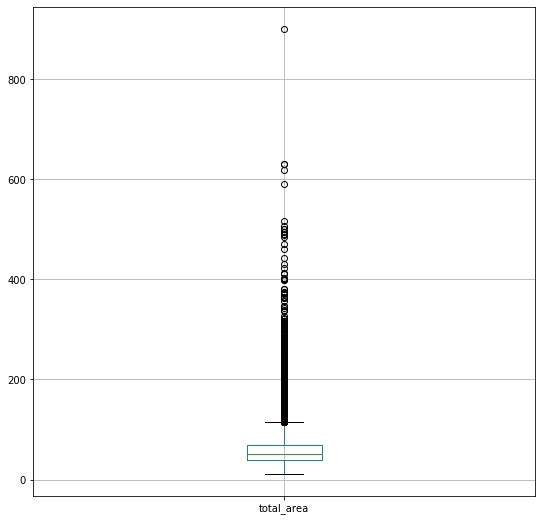

In [31]:
df.boxplot(column=['total_area'], figsize=(9,9));

Средняя площадь квартиры составляет 60 $м^2$, медианная 52 $м^2$. 

Минимальная общая площадь составляет 12 $м^2$.

Максимальное значение площади 900 $м^2$. 

Скорее всего значения более 200 метров являются выбросами.  

Посмотрим на статистики столбца `last_price` 

In [32]:
df['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

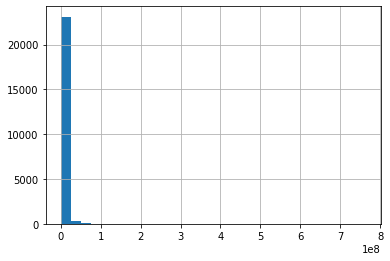

In [33]:
df['last_price'].hist(bins=30);

(1, 20000000)

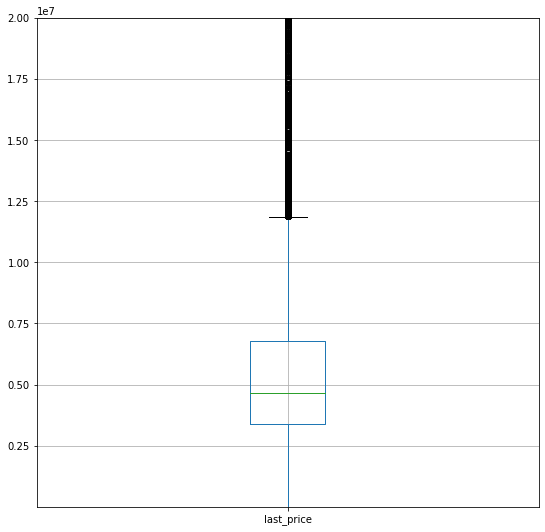

In [34]:
df.boxplot(column=['last_price'], figsize=(9,9));
plt.ylim(1,20000000)

Средняя стоимость квартиры на момент продажи 6.54 миллиона, медианная 4.65 миллиона. 

Стандартное отклонение составляет 10.88 миллиона, что может свидетельствовать о выбросах в данных.

Минимальное значение цены 12 тысяч.

Максимальное значение цены в 763 миллиона. 

Скорее всего значения более 12 миллионов являются выбросами. Так же надо проверить значения ниже 400 000.

In [35]:
# проверим объявления с ценой ниже 400 000
df.query('last_price < 400000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_exposition,month_exposition,year_exposition,category_floor,ratio_living_area,ratio_kitchen_area
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8,112,2,3,2019,Последний,0.293578,0.37156


Всего одно объявление с ценой ниже 400 000. Цена в объявлении указана 12 190, что явно является выбросом.

Посмотрим на статистики столбца `rooms` 

In [36]:
df['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

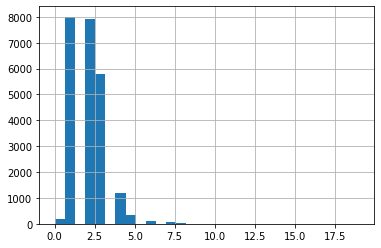

In [37]:
df['rooms'].hist(bins=30);

In [38]:
#Доля квартир студий в квартирах с количеством комнат 0
t=df.query('rooms == 0')
t['studio'].mean()

0.6958762886597938

In [39]:
t=df.query('rooms == 0')
t['open_plan'].mean()

0.30412371134020616

In [40]:
#Число квартир с количеством комнат больше 7
t=df.query('rooms > 7')
t['rooms'].count()

31

Среднее количество комнат 2, медианное 2.

Минимальное количество комнат 0.

Максимальное количество комнат 19.

70% квартир с количеством комнат 0 - это студии, а 30% - квартиры со свободной планировкой.

Количество квартир с количеством комнат больше 7 - всего 31, их можно откинуть.

Посмотрим на статистики столбца `ceiling_height` 

In [41]:
df['ceiling_height'].describe()

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

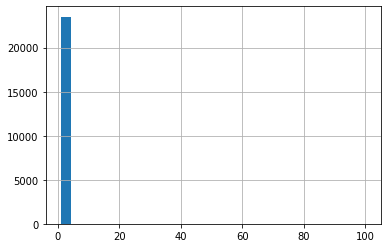

In [42]:
df['ceiling_height'].hist(bins=30);

In [43]:
#Количество квартир с потолками ниже 2 метров
t=df.query('ceiling_height < 2')
t['ceiling_height'].count()

3

In [44]:
#Количество квартир с потолками выше 4 метров
t=df.query('ceiling_height > 4')
t['ceiling_height'].count()

75

(2, 4)

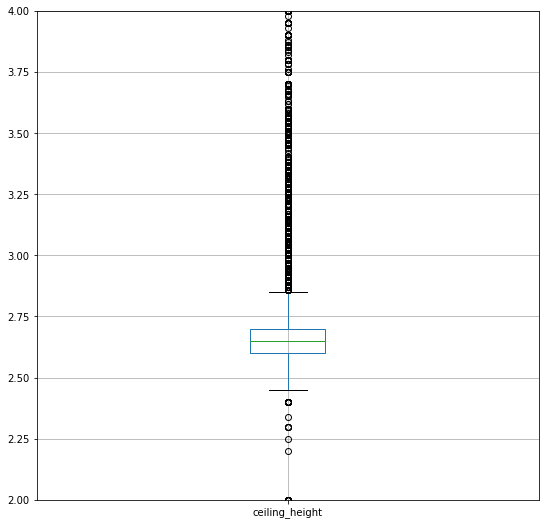

In [45]:
df.boxplot(column=['ceiling_height'], figsize=(9,9));
plt.ylim(2,4)

Средняя высота потолков 2.7 метра, медианная 2.65.

Минимальное значение высоты потолков в 1 метр. 

Максимальное значение высоты потолков в 100 метров. 

Всего 3 объявления имеют потолки менее 2 метров и всего 75 объявлений с потоками более 4 метров. Данные объявления можно отбросить.

Посмотрим на статистики столбца `days_exposition` 

In [46]:
df['days_exposition'].describe() 

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

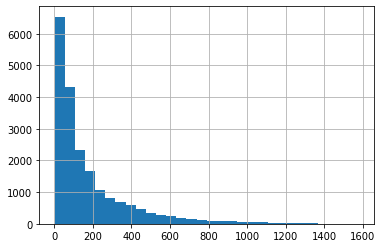

In [47]:
df['days_exposition'].hist(bins=30);

In [48]:
#Количество объявлений с временем продажи более 730 дней
t=df.query('days_exposition > 730')
t['days_exposition'].count()

746

Среднее время продажи квартиры 180 дней, медианное время 95 дней, а стандартное отклонение составляет 219 дней, что может свидетельствовать о выбросах в данных. Так же в подтверждение этой гипотезы может говорить и максимальное время продажи квартиры в 1580 дней. Возможно, это не снятые с публикации объявления.

Обычно продажа квартиры занимает порядка 95 дней.

Продажи до 45 дней можно считать быстрыми, а продажи более 232 дней необычно долгими. 

746 объявлений имеют время продажи более двух лет, скорее всего это выбросы из-за не снятых объявлений и их можно удалить. 

**Уберем редкие и выбивающиеся значения** 

In [49]:
good_df = df.query(
    '(total_area < 200) and (400000 < last_price < 12000000) and (0 <rooms < 7) and (2 < ceiling_height < 4) and (days_exposition < 730)'
)
good_df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_exposition,month_exposition,year_exposition,category_floor,ratio_living_area,ratio_kitchen_area
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82921,1,12,2018,Первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92786,3,8,2015,Другой,0.612500,0.148214
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000,1,6,2018,Другой,0.320000,0.410000
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,95066,0,9,2018,Другой,0.473684,0.299342
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.6,6,False,False,False,14.4,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155,99196,3,11,2017,Другой,0.284182,0.386059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7,False,False,False,10.6,1,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519,129904,3,10,2016,Другой,0.552812,0.145405
23692,2,1350000.0,30.00,2017-07-07,1,2.65,5,17.5,4,False,False,False,6.0,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413,45000,4,7,2017,Другой,0.583333,0.200000
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.0,8,False,False,False,8.0,0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239,73718,4,8,2016,Другой,0.641026,0.128205
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,False,False,False,8.5,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45,52542,0,1,2018,Другой,0.644068,0.144068


Посмотрим изменения в данных, после удаления редких и выбивающихся значений

In [50]:
good_df['total_area'].describe()

count    18082.000000
mean        52.881484
std         18.729821
min         12.000000
25%         39.000000
50%         48.500000
75%         63.000000
max        190.000000
Name: total_area, dtype: float64

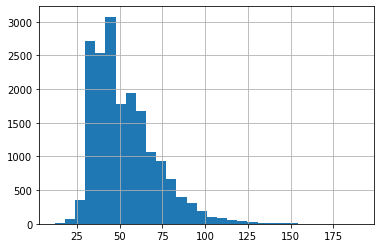

In [51]:
good_df['total_area'].hist(bins=30);

Средняя площадь квартиры после удаления редких и выбивающихся значений составляет 53 $м^2$, медианная 49 $м^2$. 

Минимальная общая площадь составляет 12 $м^2$.

Максимальное значение площади 190 $м^2$. 

Распределение стало больше походить на нормальное. Среднее значение приблизилось к медианному, а стандартное отклонение уменьшилось.

Есть пики в районе 30-50 метров, это самая распространённая застройка. 

In [52]:
good_df['last_price'].describe()

count    1.808200e+04
mean     4.790927e+06
std      2.174078e+06
min      4.300000e+05
25%      3.300000e+06
50%      4.350000e+06
75%      5.900000e+06
max      1.199900e+07
Name: last_price, dtype: float64

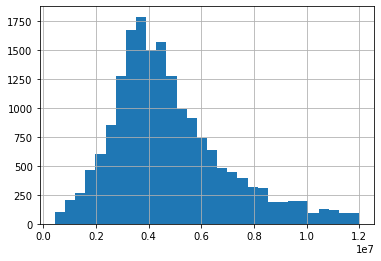

In [53]:
good_df['last_price'].hist(bins=30);

Средняя стоимость квартиры после удаления редких и выбивающихся значений составляет 4.8 миллиона, медианная 4.35 миллиона. 

Стандартное отклонение уменьшилось и составляет 2.2 миллионов.

Минимальное значение цены 430 тысяч.

Максимальное значение цены в 12 миллионов. 

Распределение стало больше походить на нормальное. Среднее значение приблизилось к медианному, а стандартное отклонение уменьшилось.

In [54]:
good_df['rooms'].describe()

count    18082.000000
mean         1.917210
std          0.886672
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

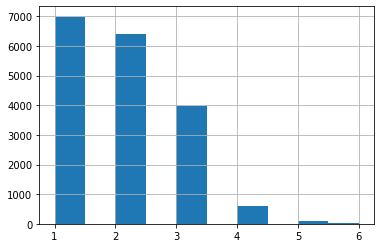

In [55]:
good_df['rooms'].hist();

Среднее количество комнат 2, медианное 2.

Минимальное количество комнат 0.

Максимальное количество комнат 6.

Количество объявлений уменьшается с увеличением количества комнат, что логично. 

In [56]:
good_df['ceiling_height'] = round(good_df['ceiling_height'], 2)
good_df['ceiling_height'].describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count    18082.000000
mean         2.668128
std          0.163467
min          2.200000
25%          2.600000
50%          2.650000
75%          2.650000
max          3.980000
Name: ceiling_height, dtype: float64

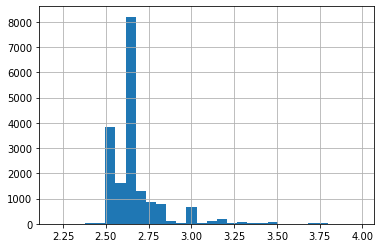

In [57]:
good_df['ceiling_height'].hist(bins=30);

Средняя высота потолков 2.67 метра, медианная 2.65.

Минимальное значение высоты потолков в 2,2 метра.

Максимальное значение высоты потолков в 3.98 метра.

В большинстве объявлений потолки от 2.6 до 2.8 метров - стандартная застройка.  

In [58]:
good_df['days_exposition'].describe()

count    18082.000000
mean       147.005199
std        153.776606
min          1.000000
25%         42.000000
50%         88.000000
75%        200.000000
max        729.000000
Name: days_exposition, dtype: float64

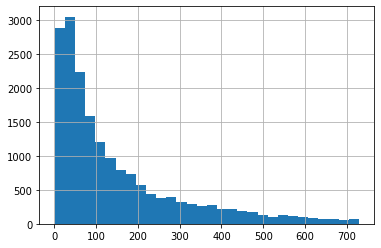

In [59]:
good_df['days_exposition'].hist(bins=30);

Среднее время продажи квартиры 147 дней, медианное время 88 дней, а стандартное отклонение составляет 154 дня. 

Минимальное время продажи квартиры 1 день

Максимальное время продажи квартиры 729 дней. Возможно, это не снятые с публикации объявления.

Обычно продажа квартиры занимает порядка 88 дней.

Продажи до 42 дней можно считать быстрыми, а продажи более 200 дней необычно долгими.

Распределение не является нормальным.

**Исследуем факторы влияющие на стоимость квартиры**

Проверим зависимость между общей площадью и стоимостью квартиры

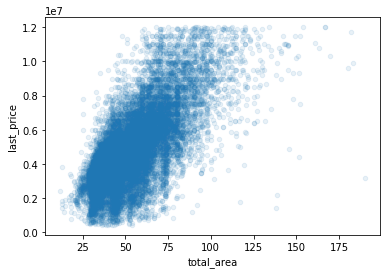

In [60]:
#Построим диаграммы разброса с зависимостью стоимости квартиры от общей площади
good_df.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1); 

In [61]:
#Посмотрим линейную зависимость стоимости квартиры от общей площади
good_df['total_area'].corr(good_df['last_price'])

0.7087978167067946

Наблюдается сильная линейная зависимость между увеличением площади и ростом цены квартиры

Проверим зависимость между количеством комнат и стоимостью квартиры

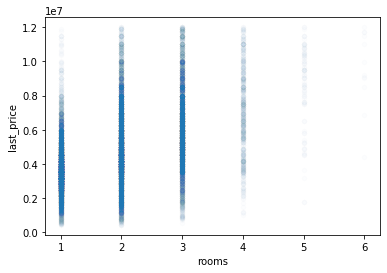

In [62]:
#Построим диаграммы разброса с зависимостью между количеством комнат и стоимостью квартиры
good_df.plot(x='rooms', y='last_price', kind='scatter', alpha=0.01); 

In [63]:
#Посмотрим линейную зависимость между количеством комнат и стоимостью квартиры
good_df['rooms'].corr(good_df['last_price'])

0.45858212408361027

Зависимость между количеством комнат и стоимостью квартиры наблюдается, но в меньшей степени, чем от общей площади. 

Проверим зависимость между удаленностью от центра и стоимостью квартиры

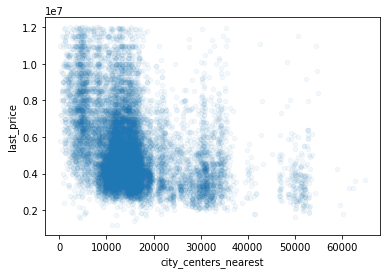

In [64]:
#Построим диаграммы разброса с зависимостью между удаленностью от центра и стоимостью квартиры
good_df.plot(x='city_centers_nearest', y='last_price', kind='scatter', alpha=0.05); 

In [65]:
#Посмотрим линейную зависимость между удаленностью от центра и стоимостью квартиры
good_df['city_centers_nearest'].corr(good_df['last_price'])

-0.34668395591034484

Есть обратная зависимость, чем меньше расстояние от центра, тем выше цена, но данная линейная зависимость меньше, чем от площади квартиры или количества комнат. 

In [66]:
#Посмотрим линейную зависимость между высотой потолков и стоимостью квартиры
good_df['ceiling_height'].corr(good_df['last_price'])

0.3631938148985231

Есть линейная зависимость стоимости квартиры от высоты потолков.

Проверим зависимость между этажом расположения квартиры и ее стоимостью

In [67]:
#Посмтроим сводную таблицу со средней и медианной ценой по каждому типу этажей
good_df.pivot_table(index='category_floor', values='last_price', aggfunc=['count','mean', 'median'])

,count,mean,median
,last_price,last_price,last_price
category_floor,,,
Другой,13362,4.981021e+06,4500000.0
Первый,2271,4.022809e+06,3750000.0
Последний,2449,4.466038e+06,4000000.0


Самые дешевые квартиры на первом этаже, чуть дороже квартиры на последнем этаже, самые дорогие квартиры в середине дома между первым и последним этажом.

Изучим зависимость от даты размещения: дня недели, месяца и года

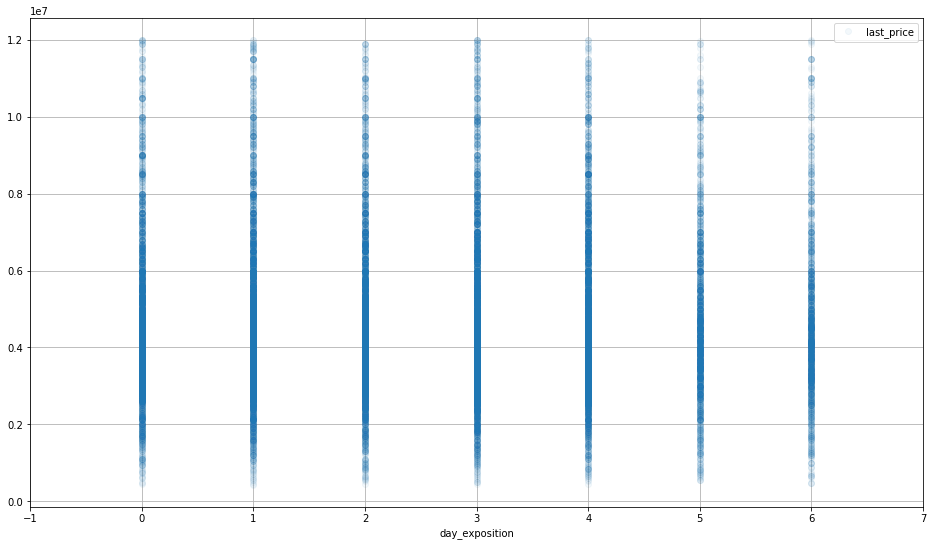

In [68]:
#Построим график зависимости стоимости от дня недели
good_df.plot(x='day_exposition', y='last_price', grid=True, style='o', xlim=(-1,7), figsize=(16,9), alpha=0.05);

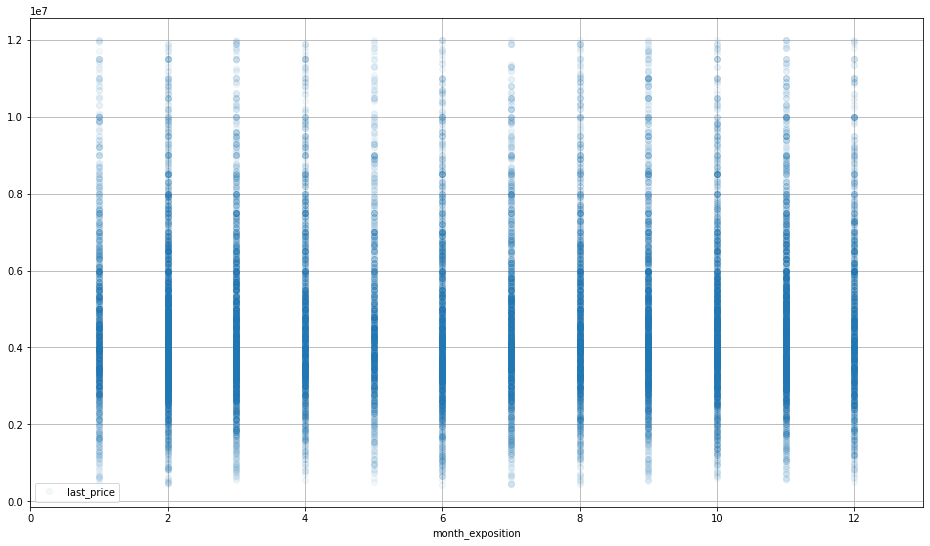

In [69]:
#Построим график зависимости стоимости от месяца
good_df.plot(x='month_exposition', y='last_price', grid=True, style='o', xlim=(0,13), figsize=(16,9), alpha=0.05);

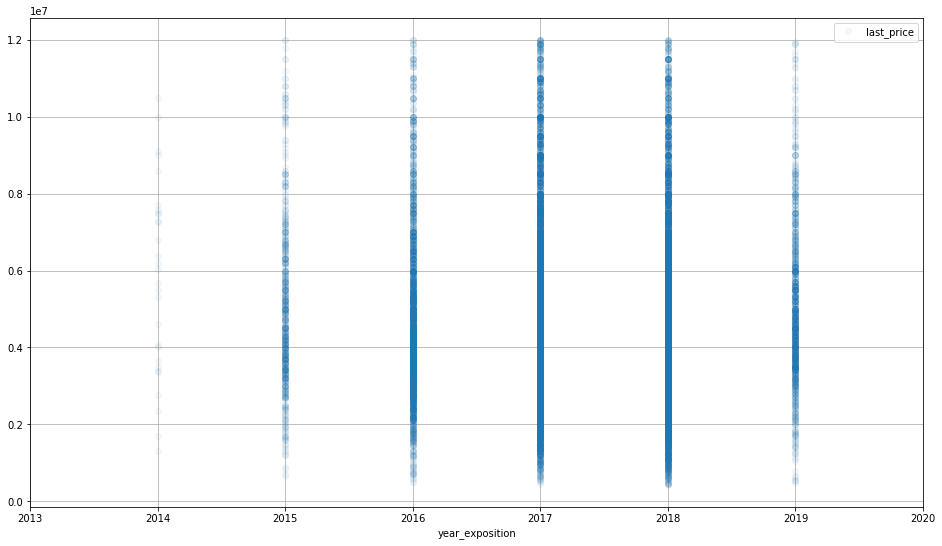

In [70]:
#Построим график зависимости стоимости от года
good_df.plot(x='year_exposition', y='last_price', grid=True, style='o', xlim=(2013,2020), figsize=(16,9), alpha=0.05);

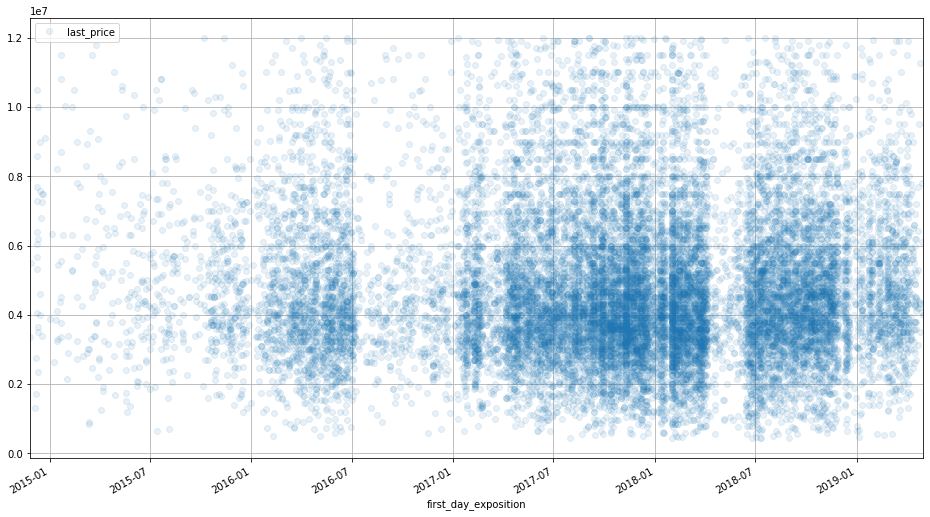

In [71]:
#Построим график зависимости стоимости от даты публикации
good_df.plot(x='first_day_exposition', y='last_price', grid=True, style='o', figsize=(16,9), alpha=0.1);

Четкой зависимости между днем недели, месяцем, годом публикации и ценой на жилье не обнаружено. 

Выведем 10 населённых пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в этих населённых пунктах.

In [72]:
#Сгруппируем цены на жилье по населенным пунктам
t = good_df.groupby('locality_name')['last_price'].agg(['count', 'mean', 'median'])
#Выведем топ 10 населенных пунктов по количеству объявлений
top10 = t.sort_values('count',ascending=False).head(10)
top10

,count,mean,median
locality_name,,,
Санкт-Петербург,11643,5.566362e+06,5000000.0
посёлок Мурино,471,3.715487e+06,3420000.0
посёлок Шушары,392,4.068413e+06,3950000.0
Всеволожск,320,3.654342e+06,3390000.0
Колпино,300,3.755117e+06,3540000.0
посёлок Парголово,290,4.415826e+06,4050000.0
Пушкин,273,5.223243e+06,4800000.0
деревня Кудрово,264,4.322240e+06,3840000.0
Гатчина,252,3.328389e+06,3015030.0


In [73]:
#Найдем населенный пункт с самой высокой средней стоимостью жилья
top10[top10['mean'] == top10['mean'].max()]

,count,mean,median
locality_name,,,
Санкт-Петербург,11643,5.566362e+06,5000000.0


In [74]:
#Найдем населенный пункт с самой низкой средней стоимостью жилья
top10[top10['mean'] == top10['mean'].min()]

,count,mean,median
locality_name,,,
Выборг,196,3.017566e+06,2750000.0


Санкт-Петербург - является городом с самой высокой средней стоймостью недвижимости.
Выборг - город с самой низкой средней стоимостью жилья

Посчитаем среднюю цену на жилье в зависимости от расстояний от центра, для определения какая область входит в центр.

In [75]:
#Создадим столбец `city_centers_km` с расстоянием до центра в километрах, округленных до целых значений
good_df = good_df.assign(city_centers_km = good_df['city_centers_nearest']/1000)
good_df['city_centers_km'] = round(good_df['city_centers_km']).astype('Int64')
good_df['city_centers_km']

1         19
2         14
4          8
5        NaN
6         19
        ... 
23691      4
23692    NaN
23693     34
23695    NaN
23697     10
Name: city_centers_km, Length: 18082, dtype: Int64

Построим автоматические графики зависимостей

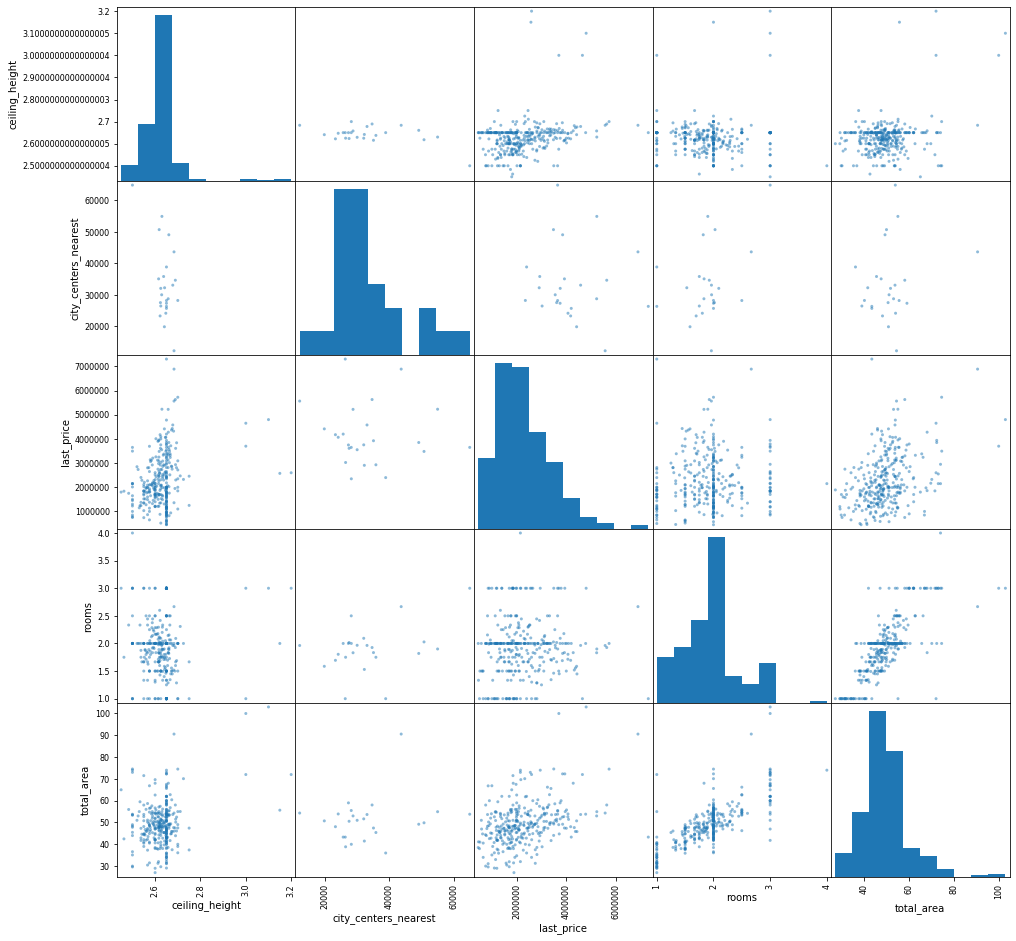

In [76]:
good_stat_multi = good_df.pivot_table(
    index='locality_name', values=['total_area', 'last_price', 'rooms','ceiling_height', 'city_centers_nearest'], aggfunc='mean'
)
pd.plotting.scatter_matrix(good_stat_multi, figsize=(16, 16)); 

In [77]:
#Сгруппируем медианные значения цен по расстоянию от центра
centr_price = good_df.groupby('city_centers_km')['last_price'].agg(['median'])
centr_price.head(15)

,median
city_centers_km,
0,7200000.0
1,8230000.0
2,8200000.0
3,6925000.0
4,7500000.0
5,7429000.0
6,6740000.0
7,6295000.0
8,6190000.0


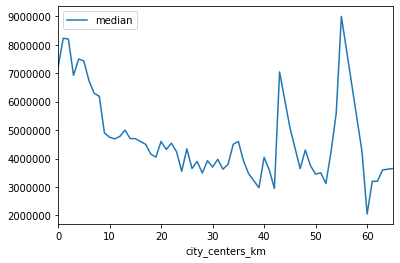

In [78]:
#Построим график зависимости медианных цен на жилье от расстояния от центра
centr_price.plot();

Заметно, что после 8-10 километров от центра цены меняются не так сильно, за исключением двух пиков, что можно считать границей центра. 

Выделим сегмент квартир в центре и проанализируем его

In [79]:
#Сделаем срез из данных по расстоянию от центра не более 10 км
centr_df = good_df.query('city_centers_km < 10')
centr_df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_exposition,month_exposition,year_exposition,category_floor,ratio_living_area,ratio_kitchen_area,city_centers_km
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000,1,6,2018,Другой,0.320000,0.410000,8
24,8,6500000.0,97.2,2015-10-31,2,2.65,3,46.5,1,False,False,False,19.6,0,Санкт-Петербург,20052.0,2336.0,3.0,411.0,3.0,124.0,265,66872,5,10,2015,Первый,0.478395,0.201646,2
61,18,7990000.0,74.0,2017-08-24,2,2.65,4,43.0,4,False,False,False,20.0,0,Санкт-Петербург,22568.0,4288.0,1.0,363.0,0.0,NaN,609,107973,3,8,2017,Последний,0.581081,0.270270,4
70,9,3400000.0,30.0,2018-09-05,1,2.65,5,16.0,1,False,False,False,7.0,0,Санкт-Петербург,39053.0,8313.0,1.0,382.0,0.0,NaN,14,113333,2,9,2018,Первый,0.533333,0.233333,8
85,13,5200000.0,46.3,2018-11-26,2,3.00,5,27.8,5,False,False,False,8.0,0,Санкт-Петербург,13334.0,9319.0,0.0,NaN,1.0,682.0,65,112311,0,11,2018,Последний,0.600432,0.172786,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23665,11,4250000.0,47.0,2016-05-20,1,2.65,6,18.2,1,False,False,False,14.6,0,Санкт-Петербург,20503.0,4946.0,2.0,624.0,1.0,519.0,131,90426,4,5,2016,Первый,0.387234,0.310638,5
23668,13,6000000.0,47.0,2018-03-16,2,3.00,5,27.0,4,False,False,False,9.0,1,Санкт-Петербург,36474.0,9167.0,2.0,238.0,0.0,NaN,157,127660,4,3,2018,Другой,0.574468,0.191489,9
23681,13,5250000.0,43.0,2018-05-11,2,2.50,5,29.0,2,False,False,False,6.0,0,Санкт-Петербург,28323.0,7262.0,1.0,497.0,2.0,660.0,80,122093,4,5,2018,Другой,0.674419,0.139535,7
23690,3,5500000.0,52.0,2018-07-19,2,2.65,5,31.0,2,False,False,False,6.0,0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15,105769,3,7,2018,Другой,0.596154,0.115385,6


Посмотрим на общую площадь квартир в центре

In [80]:
centr_df['total_area'].describe()

count    2714.000000
mean       63.083615
std        23.412427
min        12.000000
25%        45.000000
50%        60.000000
75%        77.175000
max       190.000000
Name: total_area, dtype: float64

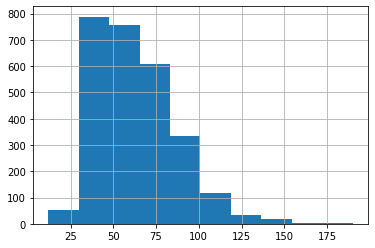

In [81]:
centr_df['total_area'].hist();

In [82]:
centr_df['total_area'].corr(centr_df['last_price'])

0.7287920826267484

Средняя площадь квартиры в центре составляет 63  м2, что больше чем в среднем по району, медианная 60 м2 .

Минимальная общая площадь составляет 12  м2 .

Максимальное значение площади 190  м2 .

В среднем квартиры в центре имеют большую площадь.

Посмотрим на данные по цене квартир в центре

In [83]:
centr_df['last_price'].describe()

count    2.714000e+03
mean     6.918912e+06
std      2.301543e+06
min      1.600000e+06
25%      5.100000e+06
50%      6.700000e+06
75%      8.515000e+06
max      1.199900e+07
Name: last_price, dtype: float64

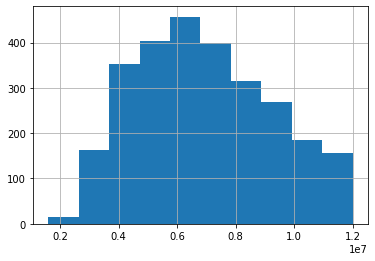

In [84]:
centr_df['last_price'].hist();

Средняя стоимость квартиры в центре составляет 6.9 миллиона, медианная 6.7 миллиона, что больше, чем в других районах.

Минимальное значение цены 1.6 миллиона, что сильно больше, чем в других районах.

Максимальное значение цены в 12 миллионов.

Распределение стало больше походить на нормальное. Среднее значение приблизилось к медианному, а стандартное отклонение уменьшилось.

Посмотрим на данные по количеству комнат в центре

In [85]:
centr_df['rooms'].describe()

count    2714.000000
mean        2.236551
std         0.991697
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64

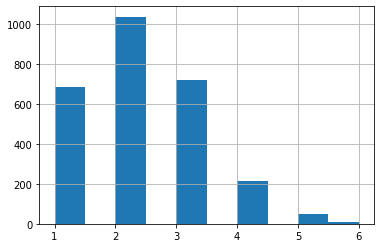

In [86]:
centr_df['rooms'].hist();

In [87]:
centr_df['rooms'].corr(centr_df['last_price'])

0.5029534114687099

Среднее количество комнат 2,2, медианное 2.

Минимальное количество комнат 1.

Максимальное количество комнат 6.

В центре количеству двухкомнатных квартир превышает количество однокомнатных, в других районах наоборот.

Так же отсутствуют квартиры студии и квартиры с индивидуальной планировкой.

Посмотрим данные о высоте потолков в центре

In [88]:
centr_df['ceiling_height'].describe()

count    2714.000000
mean        2.819352
std         0.277155
min         2.400000
25%         2.650000
50%         2.650000
75%         3.000000
max         3.980000
Name: ceiling_height, dtype: float64

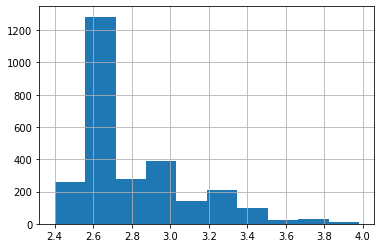

In [89]:
centr_df['ceiling_height'].hist();

In [90]:
centr_df['ceiling_height'].corr(centr_df['last_price'])

0.27552828782826166


Средняя высота потолков 2.82 метра, медианная 2.65.

Минимальное значение высоты потолков в 2,4 метра.

Максимальное значение высоты потолков в 3.98 метра.

В среднем потолки в центральном районе выше, чем в других районах

In [91]:
centr_df['city_centers_nearest'].corr(centr_df['last_price'])

-0.29914744716799546

Посмотрим данные о длительности продаж квартир в центре

In [92]:
centr_df['days_exposition'].describe()

count    2714.000000
mean      168.281872
std       171.341490
min         2.000000
25%        44.250000
50%       102.000000
75%       234.000000
max       727.000000
Name: days_exposition, dtype: float64

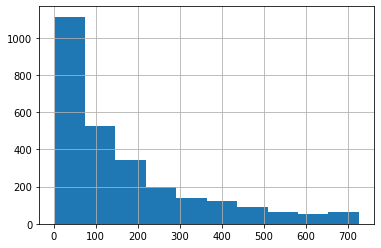

In [93]:
centr_df['days_exposition'].hist();

Среднее время продажи квартиры в центре 168 дней, медианное время 102 дней, а стандартное отклонение составляет 171 день.

Минимальное время продажи квартиры 2 дня

Максимальное время продажи квартиры 727 дней. Возможно, это не снятые с публикации объявления.

Обычно продажа квартиры занимает порядка 102 дней.

Продажи до 45 дней можно считать быстрыми, а продажи более 234 дней необычно долгими.

Длительность продажи квартир в центре в среднем больше, чем в других районах.

Распределение не является нормальным.

Проверим зависимость между этажом расположения квартиры и ее стоимостью в центре

In [94]:
centr_df.pivot_table(index='category_floor', values='last_price', aggfunc=['count','mean', 'median'])

,count,mean,median
,last_price,last_price,last_price
category_floor,,,
Другой,1935,7.115139e+06,6950000.0
Первый,340,5.814585e+06,5545000.0
Последний,439,6.909282e+06,6600000.0


Самые дешевые квартиры на первом этаже, чуть дороже квартиры на последнем этаже, самые дорогие квартиры в середине дома между первым и последним этажом, но квартиры на всех этажах дороже, чем в других районах.

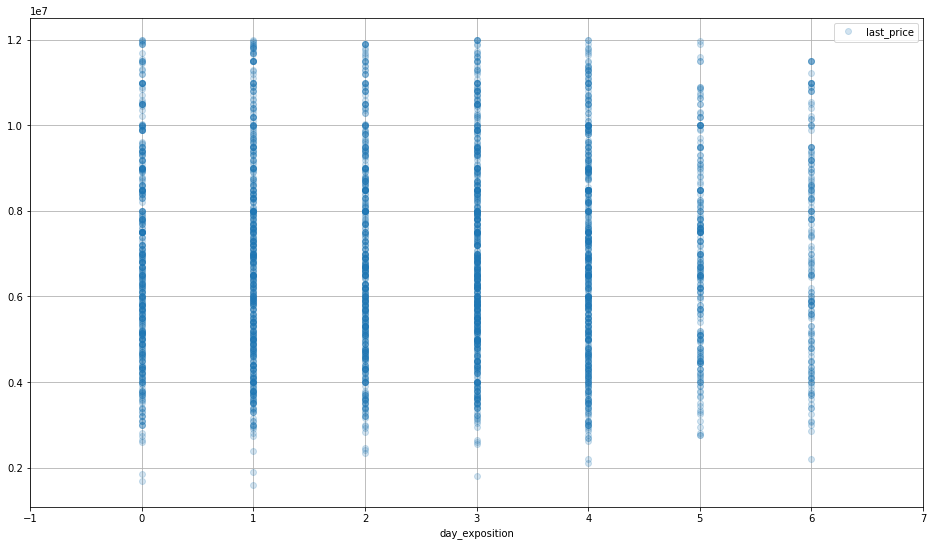

In [95]:
centr_df.plot(y='last_price', x='day_exposition', grid=True, style='o', xlim=(-1,7), figsize=(16,9), alpha=0.2);

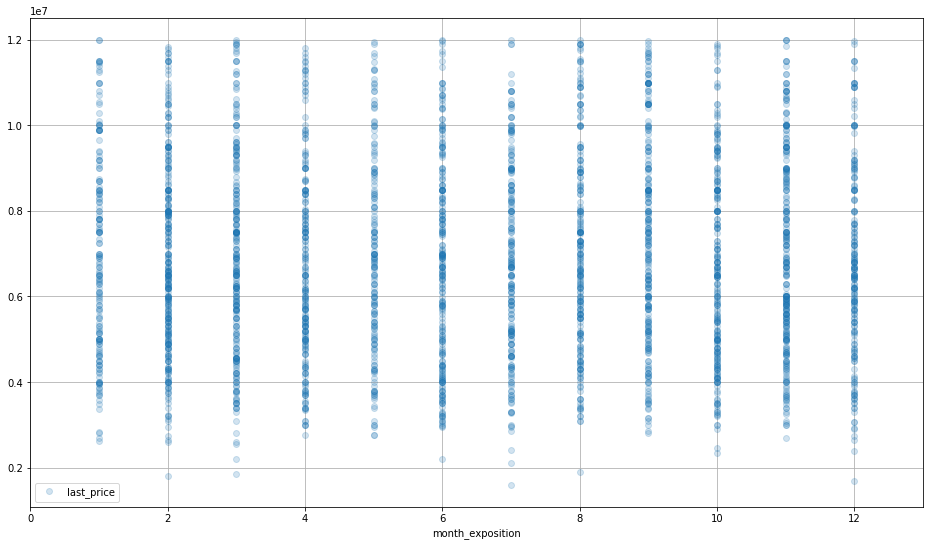

In [96]:
centr_df.plot(y='last_price', x='month_exposition', grid=True, style='o', xlim=(0,13), figsize=(16,9), alpha=0.2);

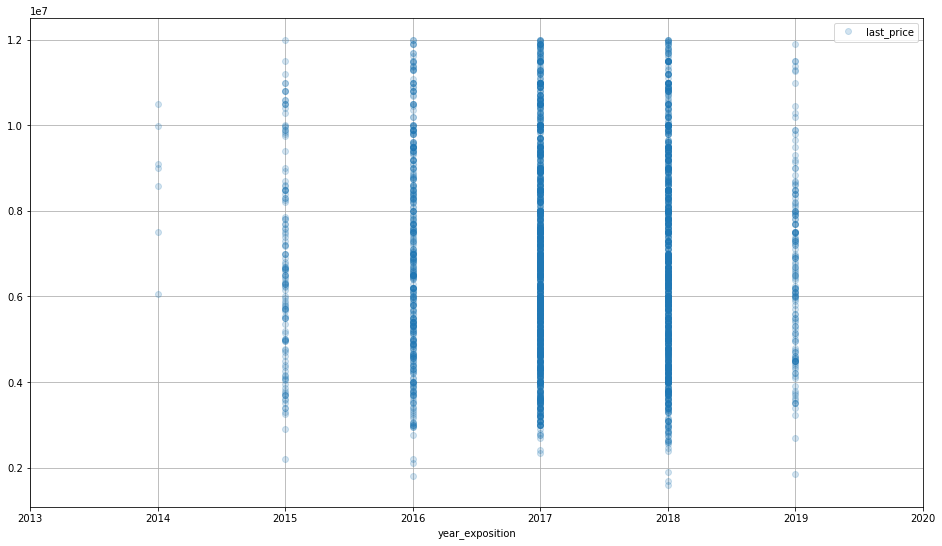

In [97]:
centr_df.plot(y='last_price', x='year_exposition', grid=True, style='o', xlim=(2013,2020), figsize=(16,9), alpha=0.2);

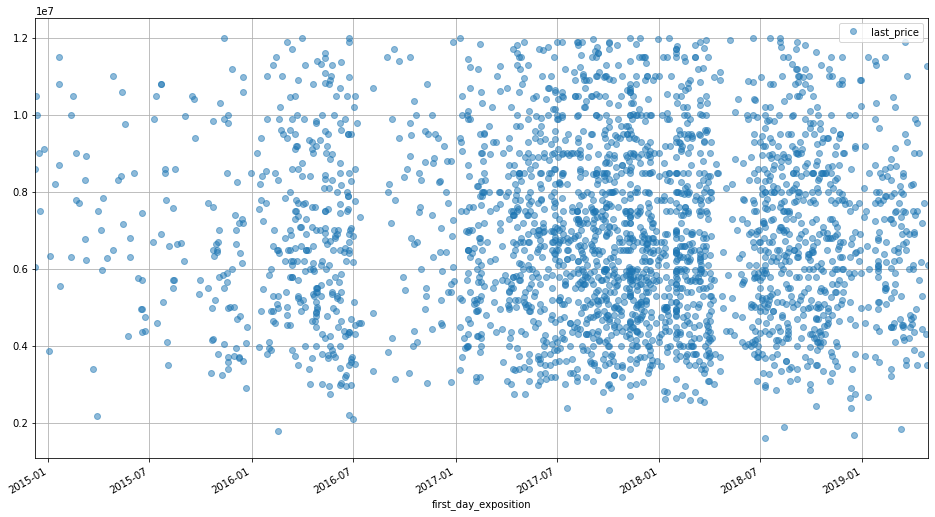

In [98]:
centr_df.plot(x='first_day_exposition', y='last_price', grid=True, style='o', figsize=(16,9), alpha=0.5);

Четкой зависимости между днем недели, месяцем, годом публикации и ценой на жилье в центре не обнаружено.

Определим на сколько процентов квадратный метр недвижимости в центре дороже, чем в других областях

In [99]:
(centr_df['price_per_meter'].mean() / (good_df['price_per_meter'].mean()/100))-100

24.506072208075764

### Вывод
1) Были проанализированы площадь, стоимость, количество комнат, высота потолков и длительность размещения объявления; 

2) После анализа информации были удалены слишком редкие и выбивающиеся значения, что средние значения к медианным и сделало информацию более правдоподобной;

3) Были проанализированы факторы влияющие на стоимость квартиры. Наибольшее влияние имеет общая площадь квартиры корреляция 0.70, меньший коэффициент корреляции имеет количество комнат 0,46, высота потолков 0,36 и расстояние от центра -0,35;

4) Так же на цену влияет на каком этаже расположена квартира в среднем квартиры на первом этаже самые дешевые, чуть дороже квартиры на последнем этаже, самые дорогие квартиры в середине дома между первым и последним этажом;

5) Зависимости между датой публикации сообщения (дня недели, месяца и года) выявить не удалось;

6) Были найдены 10 населенных пунктов с наибольшим количеством объявлений. Санкт-Петербург сал городом с самой высокой средней стоимостью квартиры - 5,5 миллиона, а Выборг с самой низкой - 3 миллиона;

7) Было посчитано расстояние центральной области — это 8-10 км от центра;

8) Проанализировав сегмент объявлений из центра выявлено, что квартиры в центре имеют большую среднюю (63 $м^2$ против 53 $м^2$) медианную площадь (60 $м^2$ против 49 $м^2$);

9) Проанализировав сегмент объявлений из центра выявлено, что квартиры в центре имеют большую среднюю и медианную цену (6.9 и 6.7 миллиона против 4.8 и 4.4 миллионов);

10) В центре количеству двухкомнатных квартир превышает количество однокомнатных, в других районах наоборот;

11) В центре отсутствуют квартиры студии и квартиры с индивидуальной планировкой;

12) В среднем потолки в центральном области выше, чем в других областях;

13) Время продажи квартиры в центре больше, чем в других областях на 20-30 дней;

14) Были проанализированы факторы влияющие на стоимость квартиры в центре. Наибольшее влияние имеет общая площадь квартиры корреляция 0.72, меньший коэффициент корреляции имеет количество комнат 0.50, высота потолков 0,27 и расстояние от центра -0,30;

15) В центральной области, по сравнению с другими областями, на цену больше влияет площадь квартиры, количество комнат и меньше влияет высота потолков и расстояние от центра;

16) Квадратный метр недвижимости в центре стоит на 24,5% больше, чем в других областях.

## Общий вывод

Были обнаружены пропущенные значения в столбцах:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м);
* `balcony` — число балконов;
* `ceiling_height` — высота потолков (м);
* `city_centers_nearest` — расстояние до центра города (м);
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия);
* `floors_total` — всего этажей в доме;
* `is_apartment` — апартаменты (булев тип);
* `kitchen_area` — площадь кухни в квадратных метрах (м²);
* `living_area` — жилая площадь в квадратных метрах (м²);
* `locality_name` — название населённого пункта;
* `parks_around3000` — число парков в радиусе 3 км;
* `parks_nearest` — расстояние до ближайшего парка (м);
* `ponds_around3000` — число водоёмов в радиусе 3 км;
* `ponds_nearest` — расстояние до ближайшего водоёма (м);

Были заполнили пропуски в столбцах:
* `is_apartment` — пропуски в данном столбце скорее всего свидетельствуют о том, что объект не является апартаментами и их можно заменить на 0;
* `balcony` — пропуски в данном столбце скорее всего свидетельствуют о том, что у объекта нет балкона и пропуски можно заменить на 0;
* `ceiling_height` — содержал 38 % пропусков, пропуски в данном столбце могут быть ошибками пользователей при заполнении. Предлагаю заполнить эти пропуски медианными значениями высоты потолков.
Удалили строки с пропусками в столбцах:
* `floors_total` — количество этажей в домене не указано менее чем у 0,4% значений столбца. Эти строки были удалены;
* `locality_name` — Название населенного пункта не было указано менее чем у 0,3% значений столбца. Эти строки были удалены.

Сменили тип столбцов:
* `is_apartment` на bool т.к. там хранится всего два вида значений;
* `first_day_exposition` хранится дата размещения объявления сменили тип на datetime;
* `days_exposition` содержит информацию о количестве дней размещений информации, привели к целочисленным значениям;
* `floors_total` хранит информацию о общем количестве этажей в доме, привели к целочисленным значениям;
* `balcony` - хранится число балконов, привели к целочисленным значениям.

Так же проверили срез данных по пропущенным значениям в столбце `days_exposition` - 13% значений содержали пропуски длительности размещения объявления. Скорее всего эти объявления не были сняты с публикации на момент получения информации.
В срезе с пропусками в столбце `days_exposition` средняя дата размещения `first_day_exposition` больше, чем средняя дата размещения в основном датафрейме. Это может подтверждать предположение о том, что пропуски в столбце `days_exposition` являются не закрытыми сделками. Было принято решение не заполнять эти пропуски.

Были посчитаны и добавлены следующие столбцы:
* `price_per_meter` - цена квадратного метра;
* `day_exposition` - день недели публикации объявления;
* `month_exposition` - месяц публикации объявления;
* `year_exposition` - год публикации объявления;
* `category_floor` - этаж квартиры; варианты — первый, последний, другой;
* `ratio_living_area` - соотношение жилой и общей площади;
* `ratio_kitchen_area` - соотношение площади кухни к общей площади.


1) Были проанализированы площадь, стоимость, количество комнат, высота потолков и длительность размещения объявления; 

2) После анализа информации были удалены слишком редкие и выбивающиеся значения, что средние значения к медианным и сделало информацию более правдоподобной;

3) Были проанализированы факторы влияющие на стоимость квартиры. Наибольшее влияние имеет общая площадь квартиры корреляция 0.70, меньший коэффициент корреляции имеет количество комнат 0,46, высота потолков 0,36 и расстояние от центра -0,35;

4) Так же на цену влияет на каком этаже расположена квартира в среднем квартиры на первом этаже самые дешевые, чуть дороже квартиры на последнем этаже, самые дорогие квартиры в середине дома между первым и последним этажом;

5) Зависимости между датой публикации сообщения (дня недели, месяца и года) выявить не удалось;

6) Были найдены 10 населенных пунктов с наибольшим количеством объявлений. Санкт-Петербург сал городом с самой высокой средней стоимостью квартиры - 5,5 миллиона, а Выборг с самой низкой - 3 миллиона;

7) Было посчитано расстояние центральной области — это 8-10 км от центра;

8) Проанализировав сегмент объявлений из центра выявлено, что квартиры в центре имеют большую среднюю (63 $м^2$ против 53 $м^2$) медианную площадь (60 $м^2$ против 49 $м^2$);

9) Проанализировав сегмент объявлений из центра выявлено, что квартиры в центре имеют большую среднюю и медианную цену (6.9 и 6.7 миллиона против 4.8 и 4.4 миллионов);

10) В центре количеству двухкомнатных квартир превышает количество однокомнатных, в других районах наоборот;

11) В центре отсутствуют квартиры студии и квартиры с индивидуальной планировкой;

12) В среднем потолки в центральном области выше, чем в других областях;

13) Время продажи квартиры в центре больше, чем в других областях на 20-30 дней;

14) Были проанализированы факторы влияющие на стоимость квартиры в центре. Наибольшее влияние имеет общая площадь квартиры корреляция 0.72, меньший коэффициент корреляции имеет количество комнат 0.50, высота потолков 0,27 и расстояние от центра -0,30;

15) В центральной области, по сравнению с другими областями, на цену больше влияет площадь квартиры, количество комнат и меньше влияет высота потолков и расстояние от центра;

16) Квадратный метр недвижимости в центре стоит на 24,5% больше, чем в других областях.


Был проведен анализ данных о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Выявлены закономерности, влияющие на цену квартир. Определены средние и медианные цены для разных областей. Так же выявлены закономерности, влияющие на цену квартир в центральной области и определены средние и медианные цены в центральной части города.